In [4]:
from files_cleaning import *
import pandas as pd
import numpy as np
import seaborn as sns
import networkx as nx
import natsort
from operator import itemgetter

import readline # see https://github.com/daniel-acuna/reviewer_assignment/issues/29
%load_ext rpy2.ipython 


pd.set_option("display.max_rows",999)

%matplotlib inline
import matplotlib.pyplot as plt

#this below wokrs offline, see here https://www.reddit.com/r/IPython/comments/3tibc8/tip_on_how_to_run_plotly_examples_in_offline_mode/
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode()  # run at the start of every ipython notebook to use plotly.offline
import cufflinks as cf
import qgrid


# import matplotlib
# matplotlib.style.use('ggplot')

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


# importing

In [5]:
##############
#GENERAL FILE#
##############

Gen_one=pd.read_excel('PAPER_1_Gen_1_rule_thin_1.xls')
Gen_two=pd.read_excel('PAPER_1_Gen_2_rules.xls')
Gen_three=pd.read_excel('PAPER_1_Gen_3_genetic_res.xls')
Gen_four=pd.read_excel('PAPER_1_Gen_4_eco_serv.xls')

ecoregion='/media/giuseppec/25F62A4E5FEED162/work/FORMIT/WP3/LCA/correspondence_file/countr_ecor_correspondence.csv'
management_codes='/media/giuseppec/25F62A4E5FEED162/work/FORMIT/WP3/LCA/correspondence_file/Sp_man_codes.xls'
species_codes='/media/giuseppec/25F62A4E5FEED162/work/FORMIT/WP3/LCA/correspondence_file/Sp_man_codes.xls'

gen_no_ped=import_general_file(Gen_one,Gen_two,Gen_three,Gen_four,ecoregion,management_codes,species_codes)

#add pedigree 
gen_all=add_pedigre(gen_no_ped,'Pedigree_matrix_GC.xls') 

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


/home/giuseppec/miniconda3/envs/graphs/lib/python3.5/site-packages/pandas/util/decorators.py:91: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/media/giuseppec/25F62A4E5FEED162/work/papers/first paper questionnarie/graphs_tables/files_cleaning.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/media/giuseppec/25F62A4E5FEED162/work/papers/first paper questionnarie/graphs_tables/files_cleaning.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/media/giuseppec/25F62A4E5FEED162/work/

# Export excel

In [6]:
# export_file(gen_all,
#             '/media/giuseppec/25F62A4E5FEED162/work/papers/first paper questionnarie/ELCIFO/database/general_information.xls',
#             ['Country','Man_syst','Sp_group','Man_syst_code','Sp_gr_code','FU','Rel', 'Compl', 'T_cor', 'G_cor','FT_cor', 'DQD', 'QA',
#              'itinerary','Rotation','Goal_diam','Main_sp','Mois_field','Den_fresh','Den_dried','OMS','OMS-Mois','OMS-Den_fre','OMS-Den__dri','Sec_sp','SS-Mois','SS-Den_fresh','reg','type_seed',
#           'Age_seed','Orig_seed','Dens','equip','staff','harv_equip','harv_staff','road','trail','Rul__th1','Val_th1','typ_th1',
#           'targ_th1','un_th1','com_th1','Rul__cle','Val_cle','com_cle','Rul__sel','Val_sel','targ_sel','un_sel','com_sel','Rul__pre',
#           'Val_pre','age_pre','targ_pre','com_pre','Rul__grad','Val_grad','com_grad','DS_rot/goal','DS_comp','DS_reg','DS_transp',
#           'DS_int/rul','DS_equip','DS_inpu','DS_harv/ha']
#            )

# Filter low quality data

In [4]:
gen_all=filter_pedigre(gen_all,'Pedigree_matrix_GC.xls',['A','B'])
# gen_all[gen_all.Man_syst!='Unmanaged forests'].shape[0]


# Forest Units reported

In [5]:
#tot numb of FU
gen_all.shape[0]

195

In [6]:
#numb by ecoregion
gen_all.groupby('Ecore_name').size().sort_values(ascending=False)

Ecore_name
Central_West_EU    69
Central_East_EU    42
North_EU           40
South_West_EU      26
South_East_EU      18
dtype: int64

In [7]:
#numb by sp
gen_all.groupby(['Man_syst']).size().sort_values(ascending=False)

Man_syst
Unmanaged forests                             62
Even-aged forest with shelterwood             57
Even-aged forest: Uniform clear-cut system    41
Continuous cover forest management            14
Coppice                                        8
Short rotation                                 7
Coppice with standards                         6
dtype: int64

In [8]:
#numb by ecoregion,man
gen_all.groupby(['Ecore_name','Man_syst']).size().reset_index().sort_values(['Ecore_name','Man_syst'])

,Ecore_name,Man_syst,0
0,Central_East_EU,Continuous cover forest management,2
1,Central_East_EU,Coppice,2
2,Central_East_EU,Even-aged forest with shelterwood,13
3,Central_East_EU,Even-aged forest: Uniform clear-cut system,11
4,Central_East_EU,Short rotation,1
5,Central_East_EU,Unmanaged forests,13
6,Central_West_EU,Continuous cover forest management,4
7,Central_West_EU,Coppice,3
8,Central_West_EU,Coppice with standards,4
9,Central_West_EU,Even-aged forest with shelterwood,19


In [9]:
#numb by man,sp
gen_all.groupby(['Man_syst','Sp_group']).size().reset_index().sort_values(['Man_syst','Sp_group'])

,Man_syst,Sp_group,0
0,Continuous cover forest management,Shade tolerant conifers,10
1,Continuous cover forest management,Slow growing shade tolerant deciduous,4
2,Coppice,Fast growing deciduous,3
3,Coppice,Mediterranean evergreen trees,1
4,Coppice,Slow growing light demanding deciduous,4
5,Coppice with standards,Slow growing light demanding deciduous,5
6,Coppice with standards,Slow growing shade tolerant deciduous,1
7,Even-aged forest with shelterwood,Fast growing deciduous,2
8,Even-aged forest with shelterwood,Light demanding conifers,10
9,Even-aged forest with shelterwood,Mediterranean conifers,1


In [10]:
#numb by ecoregion,sp
gen_all.groupby(['Ecore_name','Sp_group']).size().reset_index().sort_values(['Ecore_name','Sp_group'])

,Ecore_name,Sp_group,0
0,Central_East_EU,Fast growing deciduous,5
1,Central_East_EU,Light demanding conifers,7
2,Central_East_EU,Shade tolerant conifers,10
3,Central_East_EU,Slow growing light demanding deciduous,9
4,Central_East_EU,Slow growing shade tolerant deciduous,11
5,Central_West_EU,Fast growing deciduous,11
6,Central_West_EU,Light demanding conifers,11
7,Central_West_EU,Shade tolerant conifers,16
8,Central_West_EU,Slow growing light demanding deciduous,18
9,Central_West_EU,Slow growing shade tolerant deciduous,13


In [11]:
#numb by ecoregion,man,sp
gen_all.groupby(['Ecore_name','Man_syst','Sp_group']).size().reset_index().sort_values(['Man_syst','Ecore_name'])

,Ecore_name,Man_syst,Sp_group,0
0,Central_East_EU,Continuous cover forest management,Shade tolerant conifers,1
1,Central_East_EU,Continuous cover forest management,Slow growing shade tolerant deciduous,1
18,Central_West_EU,Continuous cover forest management,Shade tolerant conifers,3
19,Central_West_EU,Continuous cover forest management,Slow growing shade tolerant deciduous,1
37,North_EU,Continuous cover forest management,Shade tolerant conifers,3
49,South_East_EU,Continuous cover forest management,Shade tolerant conifers,1
50,South_East_EU,Continuous cover forest management,Slow growing shade tolerant deciduous,1
61,South_West_EU,Continuous cover forest management,Shade tolerant conifers,2
62,South_West_EU,Continuous cover forest management,Slow growing shade tolerant deciduous,1
2,Central_East_EU,Coppice,Fast growing deciduous,2


## For sankeymatic

In [12]:
# clean_sankeymatic(gen_all)

In [13]:
# #output to copy paste in sankeymatic
# sp_outp=eco_sp_c.sankeymatic.astype(str).values
# for exc_sp in sp_outp:
#     print exc_sp

In [14]:
# #output to copy paste in sankeymatic
# man_outp=sp_man_c.sankeymatic.astype(str).values
# for exc_man in man_outp:
#     print exc_man

## Rotation

In [15]:
def data_rotat(alltog):
    """function that takes alltog and produce the table of rotation period by ecoregion,
     species groups and management to be used for the graphs"""

    #take out unmanaged and continuous
    rotation=alltog[['Country','Ecoregion', u'Man_syst', u'Sp_group',"Man_syst_code", "Sp_gr_code",'Rotation','FU']]
    non_man=['Unmanaged forests','Continuous cover forest management'] 
    rotation=rotation[~rotation.Man_syst.isin(non_man)]
    
    rotation['rot_yrs']=rotation['Rotation']
    
    #change rotation categoris with int
    rota_val=['0', '1-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50',
     '51-55', '56-60', '61-65', '66-70', '71-75', '76-80', '81-85', '86-90', '91-95', '96-100',
     '101-105', '106-110', '111-115', '116-120', '121-125', '126-130', '131-135', '136-140', '141-145', '146-150',
     '151-155', '156-160', '161-165', '166-170', '171-175', '176-180', '181-185', '186-190', '191-195', '196-200',
     '201-205', '206-210', '211-215', '216-220','221-225']
    rot_conv={}
    for ind,val in enumerate(rota_val):
        rot_conv[val]=ind
    rotation.Rotation.replace(rot_conv,inplace=True)
    
    #sort man_sp
    rotation=rotation.sort_values('FU')
    
    

    # rotation.Rotation=rotation.Rotation.astype(str)   #needed before when I converted to categories, not anymore


    y_labels=itemgetter(*(range(0,len(rota_val)+1,5)))(rota_val) #the ytick lables
    
    
    return rotation,y_labels
rotat,y_lab=data_rotat(gen_all)

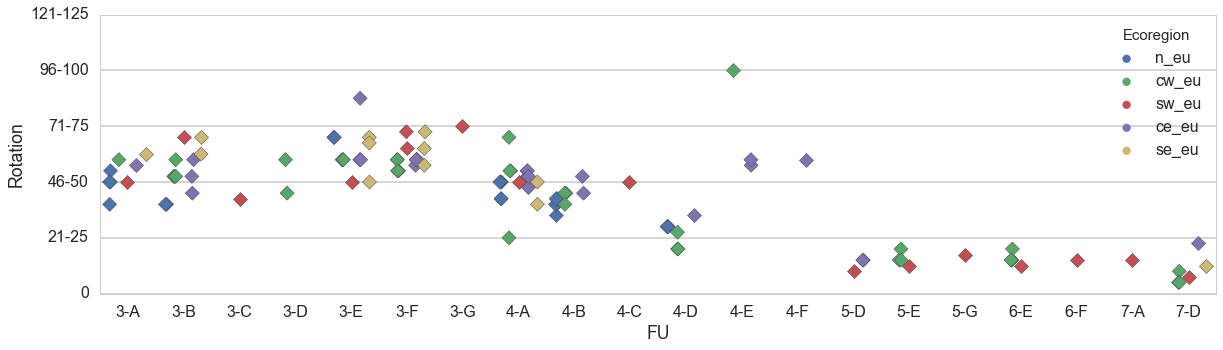

In [16]:
plt.figure(figsize=(20, 5))
sns.set_style("whitegrid")


sns.set_context("poster")
# sw_r=sns.swarmplot(x="FU", y="Rotation", hue="Ecoregion",data=rotat,size=9,split=True,edgecolor='gray')
# sw_r=sns.boxplot(x="FU", y="Rotation", data=rotat)

sw_r=sns.stripplot(x="FU", y="Rotation", hue="Ecoregion",data=rotat,size=10,split=True,jitter=True,linewidth=0.5,marker="D",)#,marker=next(mark))# 
sw_r.set(ylim=(0)) #http://stackoverflow.com/questions/25212986/how-to-set-some-xlim-and-ylim-in-seaborn-lmplot-facetgrid
sw_r.set(yticklabels=y_lab); #change the ytick lables style='darkgrid'


In [17]:
#number-yr_range relation (used below)
rot_val=rotat[['Rotation','rot_yrs']].drop_duplicates().dropna()

In [18]:
#average rotation lenght
rot_val[rot_val.Rotation==rotat['Rotation'].mean().round()]

,Rotation,rot_yrs
150,18.0,86-90


In [19]:
# avg rotation lenght by man syst
avg_man=rotat[['Man_syst','Rotation']].groupby('Man_syst').mean().round().reset_index()  #4=16-20; 5=21-25;6=26-30; 17.0 =81-85;23 =111-115
avg_man.merge(rot_val, how='left',on='Rotation').sort_values('Rotation')

,Man_syst,Rotation,rot_yrs
4,Short rotation,4.0,16-20
0,Coppice,6.0,26-30
1,Coppice with standards,6.0,26-30
3,Even-aged forest: Uniform clear-cut system,18.0,86-90
2,Even-aged forest with shelterwood,23.0,111-115


In [20]:
# avg rotation lenght by sp gr
avg_man=rotat[['Sp_group','Rotation']].groupby('Sp_group').mean().round().reset_index()  #4=16-20; 5=21-25;6=26-30; 17.0 =81-85;23 =111-115
avg_man.merge(rot_val, how='left',on='Rotation').sort_values('Rotation')

,Sp_group,Rotation,rot_yrs
0,Fast growing deciduous,9.0,41-45
2,Mediterranean conifers,18.0,86-90
3,Mediterranean evergreen trees,18.0,86-90
5,Slow growing light demanding deciduous,19.0,91-95
1,Light demanding conifers,20.0,96-100
4,Shade tolerant conifers,20.0,96-100
6,Slow growing shade tolerant deciduous,23.0,111-115


In [21]:
# max and min rotation
rotat.sort_values('Rotation',ascending=0).head()

,Country,Ecoregion,Man_syst,Sp_group,Man_syst_code,Sp_gr_code,Rotation,FU,rot_yrs
17,Belgium,cw_eu,Even-aged forest: Uniform clear-cut system,Slow growing light demanding deciduous,4,E,40.0,4-E,196-200
151,Poland,ce_eu,Even-aged forest with shelterwood,Slow growing light demanding deciduous,3,E,35.0,3-E,171-175
200,Spain,sw_eu,Even-aged forest with shelterwood,Mediterranean evergreen trees,3,G,30.0,3-G,146-150
187,Slovenia,se_eu,Even-aged forest with shelterwood,Slow growing shade tolerant deciduous,3,F,29.0,3-F,141-145
107,Italy,sw_eu,Even-aged forest with shelterwood,Slow growing shade tolerant deciduous,3,F,29.0,3-F,141-145


# Regeneration

In [22]:
def data_regen(alltog):
    """function that takes alltog and produce frequency of regeneration type by ecoregion,
     species groups and management"""
    
    reg=alltog[[u'Ecoregion',"Man_syst_code",'Country', "Sp_gr_code",u'reg','type_seed', 
                u'Age_seed','Orig_seed', u'Dens','FU']]
    reg.rename(columns={'reg': 'Regeneration type'}, inplace=True)
    # delete unamanged forest
    reg=reg[reg['Man_syst_code']!=1]


#     f, axes = plt.subplots(1, 3, figsize=(12,6), sharex=True, sharey=True)# create sublot using use axes array see http://matplotlib.org/users/recipes.html

#     g=sns.countplot(hue='reg',data=reg,x='Man_syst_code' ,ax=axes[0]) #ax=Axes i.e position to drawn the plot
#     sns.countplot(hue='reg',data=reg,x='Sp_gr_code',ax=axes[1] )
#     sns.countplot(hue='reg',data=reg,x='Ecoregion' ,ax=axes[2])
#     g.set_ylabels("survival probability")
#     f.set_label?
    return reg
regeneration=data_regen(gen_all)

/home/giuseppec/miniconda3/envs/graphs/lib/python3.5/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [23]:
# just to check density of plantation
# regeneration[['Country','FU','Ecoregion' ,'Regeneration type','Dens']].dropna(subset=['Dens']) 

In [24]:
# groupby and send to R
reg_coun=regeneration[['Country','FU','Ecoregion' ,'Regeneration type']].groupby(['FU','Ecoregion' ,'Regeneration type']).size()
reg_coun=reg_coun.reset_index()
%R -i reg_coun # send to R

/home/giuseppec/miniconda3/envs/graphs/lib/python3.5/site-packages/rpy2/robjects/functions.py:106: UserWarning:

Loading required package: ggplot2




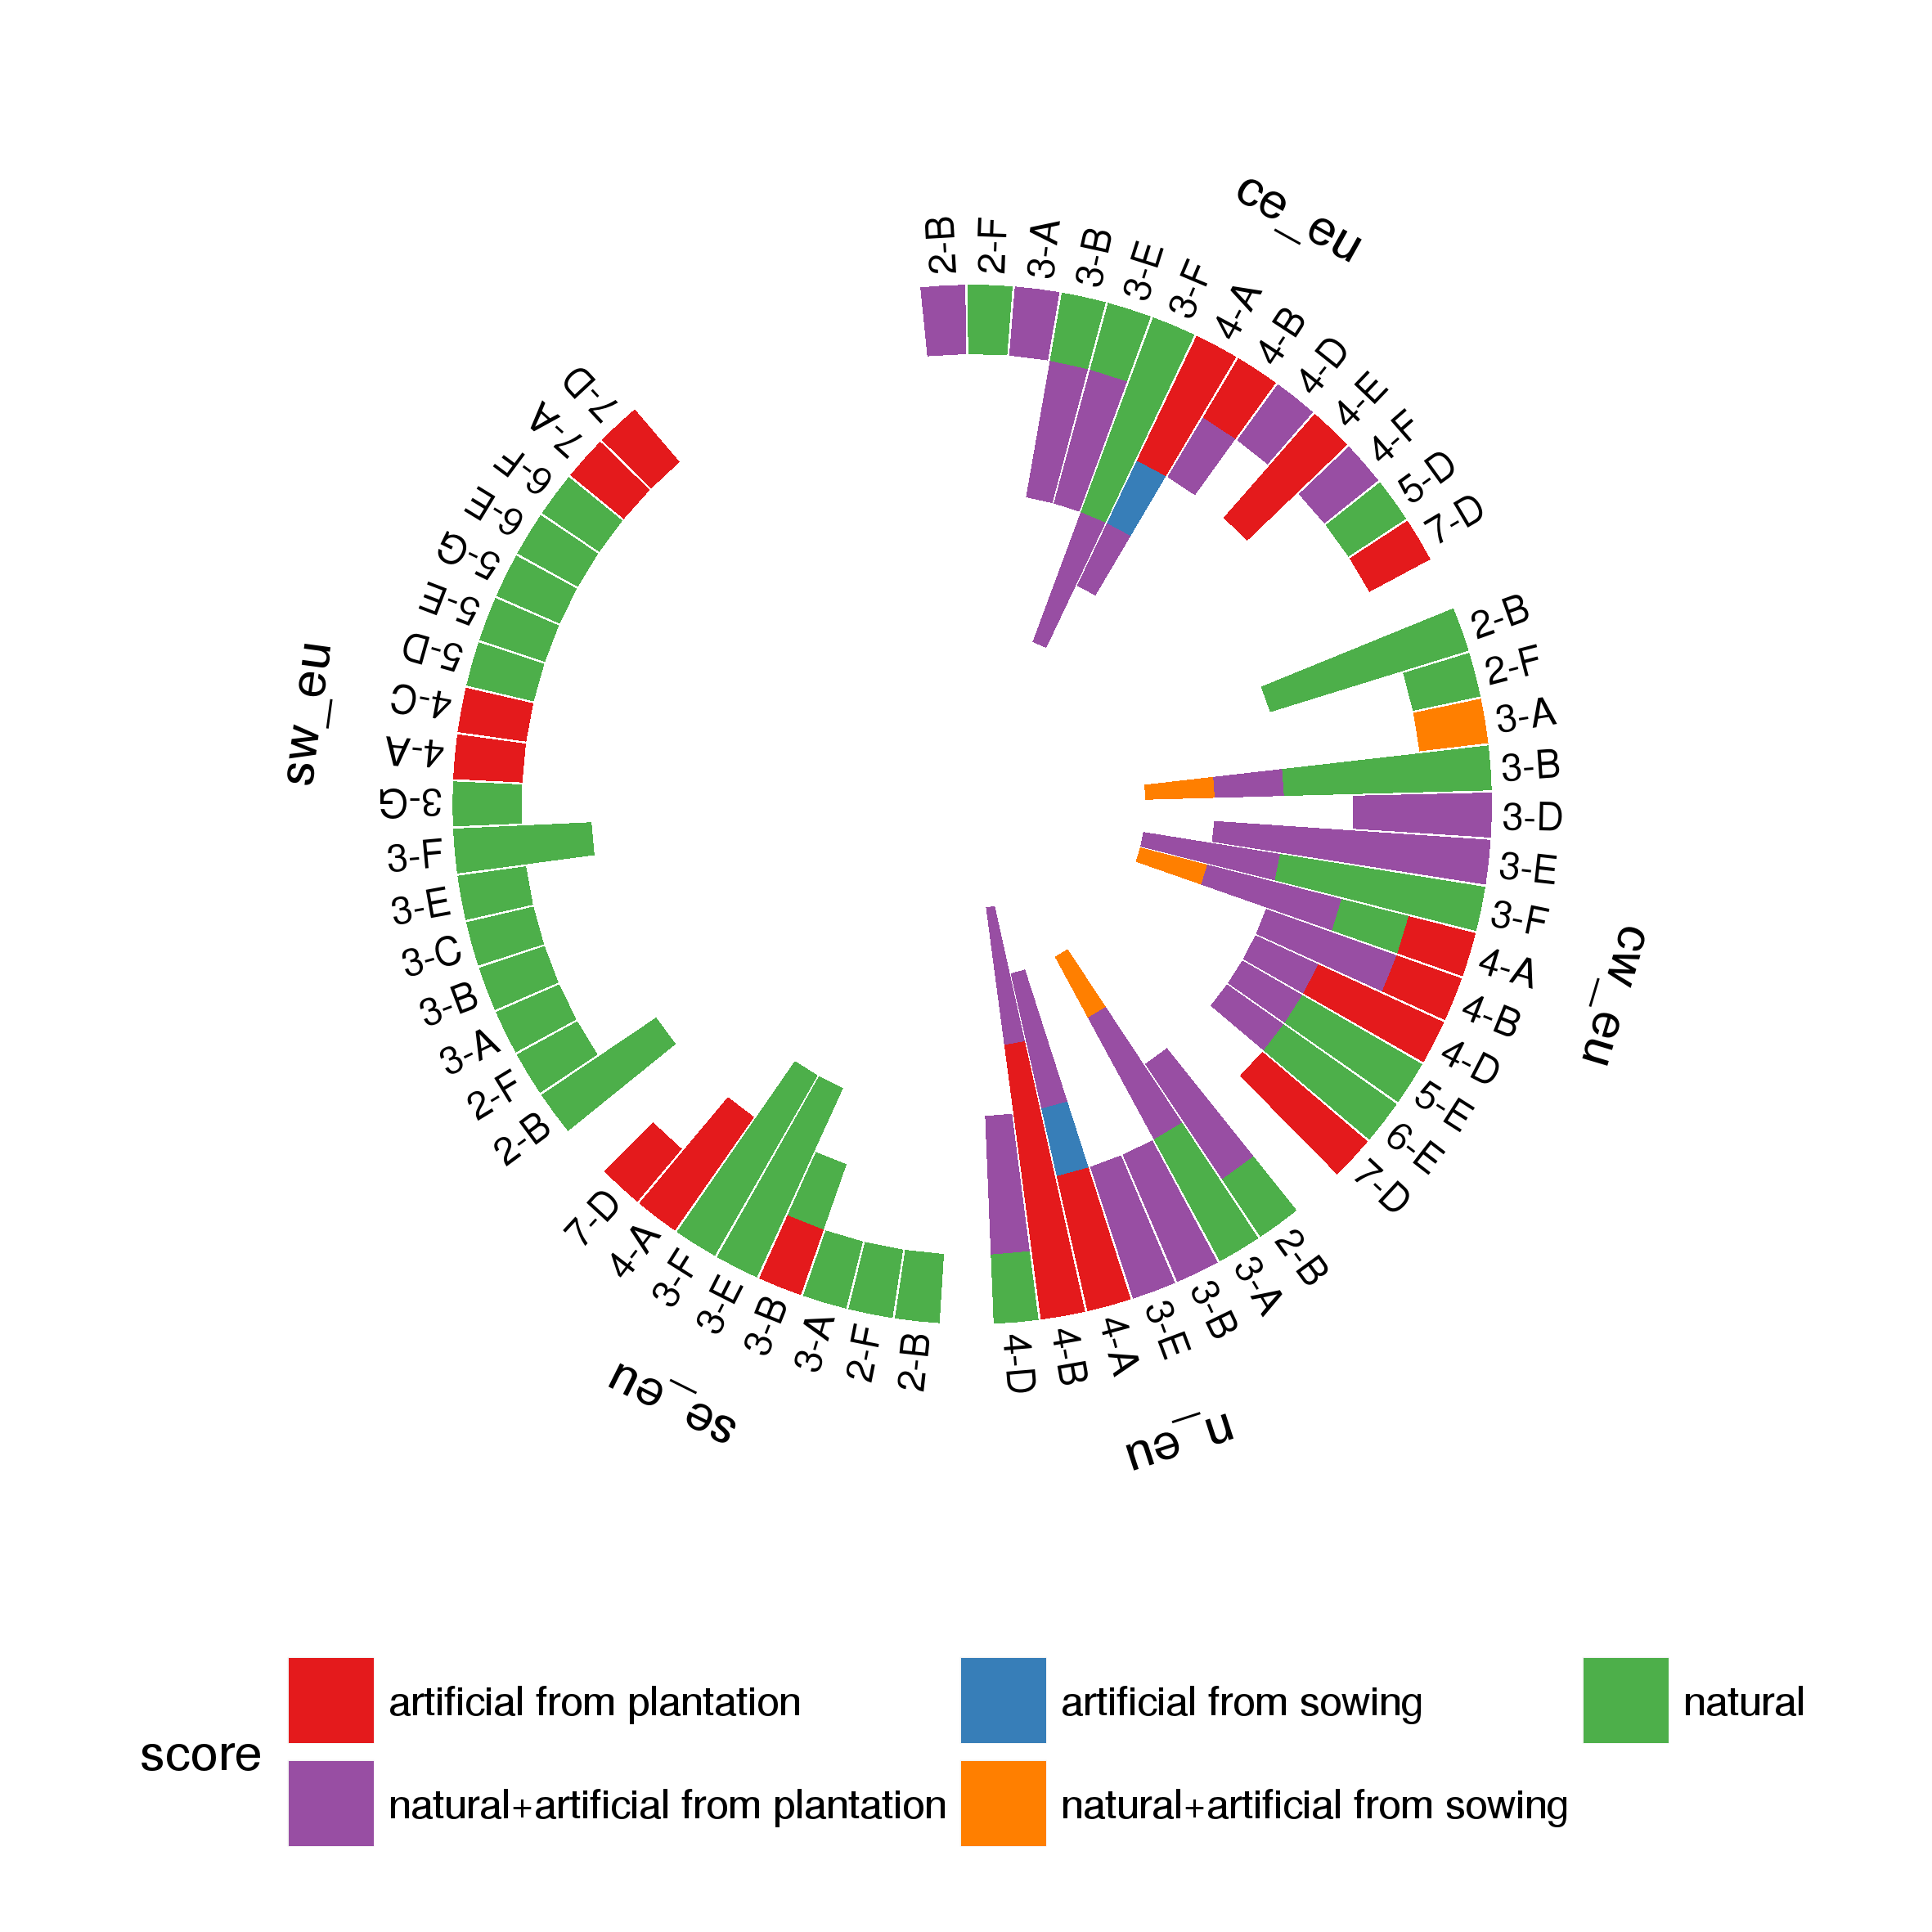

In [25]:
%%R -w 15 -h 15 -u cm --res 400 --p 14 #to change the graph resolution, see https://ipython.org/ipython-doc/2/config/extensions/rmagic.html

library(easyGgplot2)
library(phenotypicForest)

p<-polarHistogram(reg_coun, 
                  columnNames = c("family"="Ecoregion",
                                   "item"="FU",
                                "score"="Regeneration.type","value"='X0'),
                  normalised = FALSE,
#                   binSize=1,
                  spaceItem=0.05,
                  familyLabel=TRUE,
                  innerRadius = 0.2,
                  outerRadius = 1,
                  alphaStart = -0.1,
                  circleProportion = 0.92,
                  direction=1, #1 from the outside to the centre, 2 the opposite
#                   guides = c(20, 40, 70)
                 )

p <-p + theme(legend.position="bottom") #for easyggplot put legend at the bottom
p <-p + guides(fill=guide_legend(nrow=2,byrow=TRUE)) #makes the legend in two rows
print(p)






# moisture and density (TAKEN OUT VENCY'S STUFF)

In [26]:
dens=gen_all[[u'Ecoregion',"Man_syst_code",'Country', 'FU', "Sp_gr_code",'Main_sp','Mois_field', 'Den_fresh', 'Den_dried',
                 #u'Man_syst', u'Sp_group',
                ]]

dens.rename(columns={'Mois_field': 'Moisture content (%)'}, inplace=True)

#TAKE OUT VENCY'S SHIT
vency=dens[(dens['Moisture content (%)'].notnull()) & ~(dens.Country.isin(['UK','Denmark','Ireland','Netherlands']))].sort_values('FU')

/home/giuseppec/miniconda3/envs/graphs/lib/python3.5/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



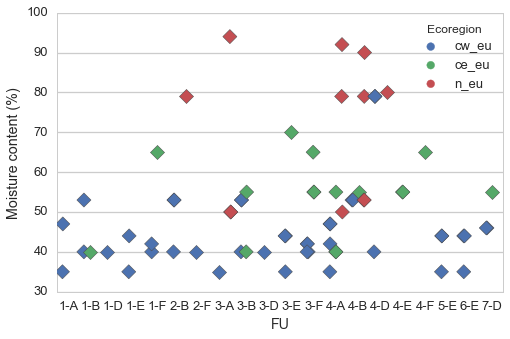

In [27]:
# moisture by FU
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
sns.set_context("talk")
ax = sns.stripplot(x='FU', y="Moisture content (%)",hue='Ecoregion',data=vency,size=10,split=True,jitter=True,linewidth=0.5,marker="D")



In [29]:
# def graph_moist(alltog):
#     """function that takes alltog and produce graphs of moisture content in the field by ecoregion,
#      species groups and management"""
#     dens=alltog[[u'Ecoregion',"Man_syst_code",'Country', "Sp_gr_code",'Main_sp','Mois_field', 'Den_fresh', 'Den_dried',
#                  #u'Man_syst', u'Sp_group',
#                 ]]

#     # sns.set_style("dark")
#     g = sns.PairGrid(dens,
#                      x_vars=['Ecoregion',"Man_syst_code", "Sp_gr_code"],
#                      y_vars=['Mois_field'], 
#                      aspect=1.2, size=3.5)

#     g.map(sns.stripplot, palette="dark",jitter=0.3, size=6) # size is the size of the bubble
# #     g.map(sns.swarmplot, palette="dark")
# #     g.map(sns.violinplot)
#     # g.map(sns.boxplot) # size is the size of the bubble

#     # g.set(ylim=(0,45)) #set limit of the 
#     # g.set(yticklabels=y_labels); #change the ytick lables
# graph_moist(gen_all)

# density

In [4]:
def data_density(all_df):
    """function tha prepare the data for graphing the density"""
    #take main sp
    dens_1=all_df[['Main_sp','Den_fresh', 'Den_dried']]
    #take secondary sp and change name cols
    dens_2=all_df[['OMS','OMS-Den_fre', 'OMS-Den__dri']]
    dens_2.columns=['Main_sp','Den_fresh', 'Den_dried']
    #combine both
    dens_both=pd.concat([dens_1,dens_2],ignore_index=True)

        #this was to sort the name of species
    # a=list(dens_both.Main_sp.unique())
    # a=[str(x) for x in a]
    # a.sort(key=lambda x: x.lower()) # to sort case insensitive, see http://stackoverflow.com/a/31726239/4929813

    #harmonize spp. names
    sp_n_harm=pd.read_excel('species_rename.xls')
    dens_both=dens_both.merge(sp_n_harm,how='left',on='Main_sp')
    dens_both.drop('Main_sp',axis=1,inplace=True)
    return dens_both
density=data_density(gen_all)



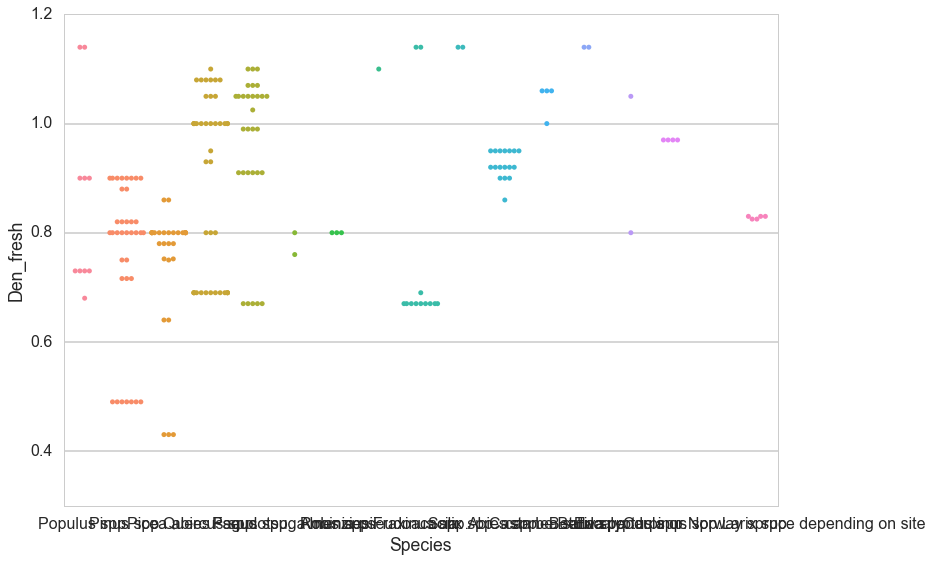

In [65]:
# sns.boxplot(x="Species", y="Den_fresh", data=dens_both)
# sns.boxplot(x="Species", y="Den_dried", data=dens_both)

sns.swarmplot(x="Species", y="Den_fresh", data=density)



# plt.xticks(rotation=45)
# dens.set_xticklabels(rotation=30)

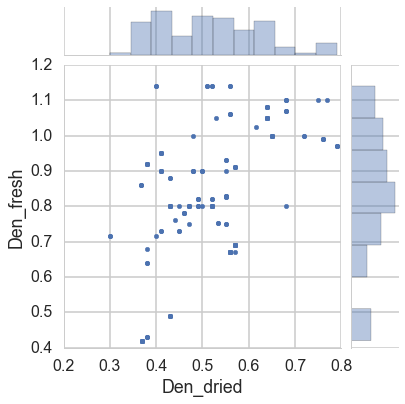

In [67]:

sns.jointplot(x="Den_dried", y="Den_fresh", data=density,kind="scatter",stat_func=None) #stat_func for correlation
#  “scatter” | “reg” | “resid” | “kde” | “hex” }, optional



In [69]:
# sns.lmplot(x="Den_dried", y="Den_fresh", data=density,hue='Species') #stat_func for correlation


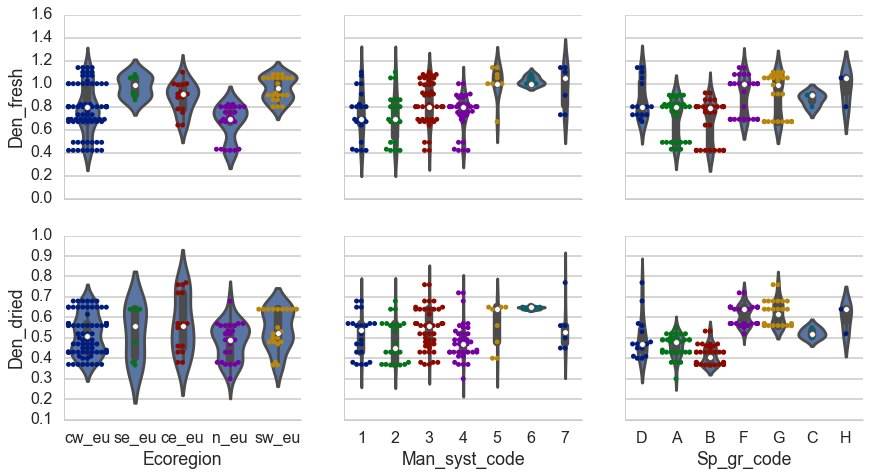

In [70]:
def graph_dens(alltog):
    """function that takes alltog and produce graphs of both dried and green densities by ecoregion,
     species groups and management"""
    
    dens=alltog[[u'Ecoregion',"Man_syst_code",'Country',
                 "Sp_gr_code",'Main_sp','Mois_field', 'Den_fresh', 'Den_dried']]

    # sns.set_style("dark")
    g = sns.PairGrid(dens,
                     x_vars=['Ecoregion',"Man_syst_code", "Sp_gr_code"],
                     y_vars=['Den_fresh','Den_dried'], 
                     aspect=1.2, size=3.5)

#     g.map(sns.stripplot, palette="dark",jitter=0.3, size=6) # size is the size of the bubble
    g.map(sns.swarmplot, palette="dark")
    g.map(sns.violinplot)
    # g.map(sns.boxplot) # size is the size of the bubble

    # g.set(ylim=(0,45)) #set limit of the 
    # g.set(yticklabels=y_labels); #change the ytick lables
graph_dens(alltog)

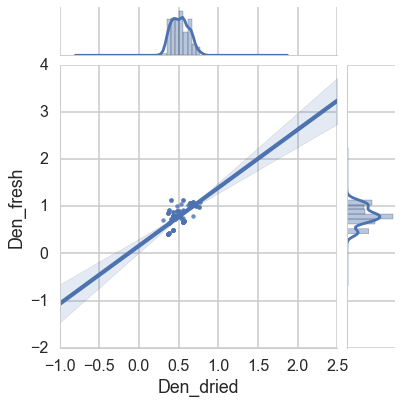

In [71]:
dens=alltog[[u'Ecoregion',"Man_syst_code",'Country', "Sp_gr_code",'Main_sp','Mois_field', 
             'Den_fresh', 'Den_dried',
             #u'Man_syst', u'Sp_group',
            ]]
import matplotlib.pyplot as plt
# f, ax = plt.subplots(figsize=(6, 6))
sns.jointplot(x="Den_dried", y="Den_fresh", data=dens,kind="reg",stat_func=None) #stat_func for correlation
# sns.rugplot(dens.Den_dried, color="g", ax=ax)

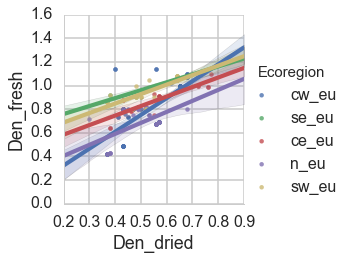

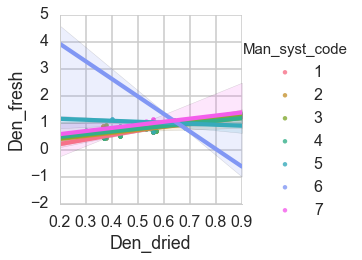

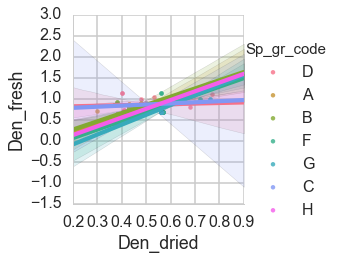

In [72]:
#SEE THIS!!! http://stackoverflow.com/questions/25212986/how-to-set-some-xlim-and-ylim-in-seaborn-lmplot-facetgrid

g=sns.lmplot(x="Den_dried", y="Den_fresh",hue='Ecoregion', data=dens,size=4) #stat_func for correlation
g=sns.lmplot(x="Den_dried", y="Den_fresh",hue='Man_syst_code', data=dens,size=4) #stat_func for correlation
g=sns.lmplot(x="Den_dried", y="Den_fresh",hue='Sp_gr_code', data=dens,size=4) #stat_func for correlation
# g.set(xlim=(0, 3), ylim=(0, 3))

In [116]:
# sns.set_style("dark")
# g = sns.PairGrid(dens,
#                  x_vars=['Ecoregion',"Man_syst_code", "Sp_gr_code"],
#                  y_vars=['Den_fresh','Den_dried'], 
#                  aspect=1.2, size=3.5)

# g.map(sns.stripplot, palette="dark",jitter=0.3, size=6) # size is the size of the bubble
# g.map(sns.lmplot(x="Den_dried", y="Den_fresh",hue='Ecoregion', data=dens)) #stat_func for correlation
# g.map(sns.boxplot) # size is the size of the bubble

# g.set(ylim=(0,45)) #set limit of the 
# g.set(yticklabels=y_labels); #change the ytick lables


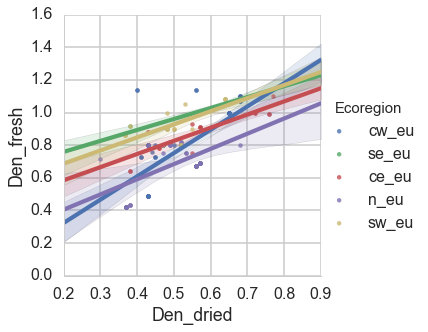

In [73]:
sns.lmplot(x="Den_dried", y="Den_fresh",hue='Ecoregion', data=dens) 